In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

from approximation.paa import PAA
from discretization.sax.sax import SAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.persist.persist import Persist
from runtime_measurements.runtime_measurements import measure_paa_approximation, measure_symbolic_discretization, generate_standard_normal_ts
from runtime_measurements.graphics import plot_execution_times

In [2]:
window_size = 2

alphabet_size = 9
alphabet_size_avg = 3
alphabet_size_slope = 3

In [3]:
sax = SAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size_avg, alphabet_size_slope)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
persist = Persist(alphabet_size)

In [4]:
execution_times = defaultdict(list)
ts_sizes = [10000*x for x in range(1, 11)]
sax_variants = [sax, a_sax, e_sax, one_d_sax, persist]

for ts_size in ts_sizes:
    df_ts = generate_standard_normal_ts(ts_size=ts_size)
    df_paa = PAA(window_size).transform(df_ts)
    for sax_variant in sax_variants:
        execution_times[sax_variant.name].append(measure_symbolic_discretization(df_paa, df_ts, window_size, sax_variant))

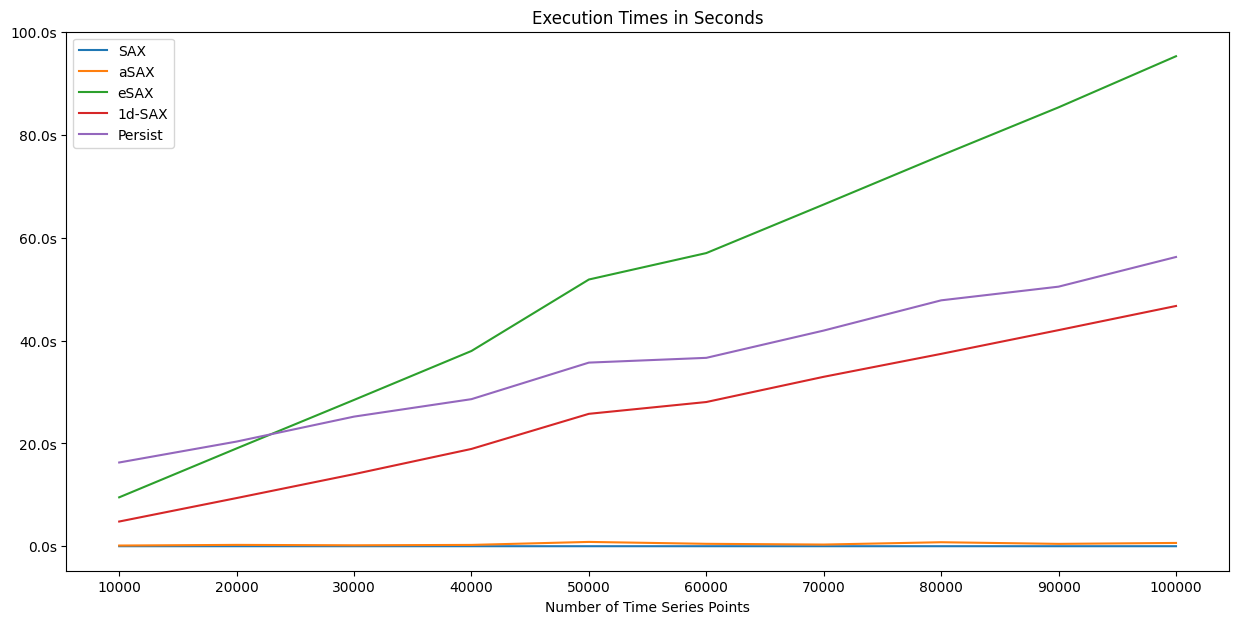

In [5]:
plot_execution_times(execution_times, ts_sizes)